# Análisis de Características de Audio - Fake vs Original

# A. Base de datos

---

## A.1. Descripción

La base de datos utilizada contiene grabaciones de audio correspondientes a diferentes eventos o clases de interés. Cada archivo representa una señal temporal que puede corresponder a sonidos ambientales, señales de maquinaria, voz u otras fuentes, dependiendo del objetivo del estudio.

Los audios están almacenados en formato digital (por ejemplo, `.wav` ) con una frecuencia de muestreo determinada, lo cual permite realizar un análisis espectral y temporal adecuado.  
Cada archivo se asocia a una etiqueta o categoría que identifica su clase, facilitando el entrenamiento y evaluación de modelos de clasificación o diagnóstico.

En el contexto del procesamiento de señales, esta base de datos sirve como fuente primaria para la **extracción de características** y el posterior **entrenamiento de modelos predictivos o de detección de fallas**.

---

## A.2. Procesamiento de audios individuales

Cada audio de la base de datos es procesado de forma independiente para obtener sus características representativas.  
El procedimiento general incluye las siguientes etapas:

1. **Lectura del archivo de audio:** se carga el archivo y se normaliza la amplitud de la señal.
2. **Preprocesamiento:** puede incluir filtrado, recorte de silencio o segmentación en ventanas temporales.
3. **Extracción de características:** se calculan distintos conjuntos de *features* como:
   - **Características temporales** (`extract_temporal_features`)
   - **Características del envolvente** (`extract_envelope_features`)
   - **Características espectrales** (`extract_spectral_features`)
   - **Características armónicas** (`extract_harmonic_features`)
   - **Coeficientes cepstrales (MFCC)** (`extract_mfcc_features`)
   - **Espectrograma Mel** (`extract_mel_spectrogram_features`)
4. **Almacenamiento de resultados:** las características extraídas se guardan en una estructura tabular o matriz para su posterior análisis.

Este procesamiento garantiza que cada archivo de audio quede representado mediante un vector de atributos que resume su comportamiento temporal, espectral y perceptual, permitiendo comparaciones objetivas entre diferentes señales.


# B. Descripción de las características obtenidas de cada audio

# Fundamentos de las características extraídas

Estas funciones se utilizan en el **procesamiento de señales de audio**, especialmente para generar **características (features)** en tareas como clasificación de sonidos, reconocimiento de voz o análisis de vibraciones.

---

## 1. `extract_temporal_features` — Características temporales

### Fundamento
Se obtienen directamente del **dominio del tiempo**, analizando cómo varía la amplitud de la señal a lo largo del tiempo.

### Características comunes
- **RMS (Root Mean Square):** mide la energía promedio de la señal → indica la **potencia** o **intensidad**.
- **Zero-Crossing Rate (ZCR):** cuántas veces la señal cruza el eje cero → alto en señales **ruidosas o agudas**.
- **Crest Factor:** relación entre el valor pico y el RMS → indica la **impulsividad**.
- **Temporal centroid:** “centro de gravedad” temporal de la energía.

### Aplicación
Útiles en **análisis de vibraciones**, **detección de fallas mecánicas** o **eventos transitorios**.

---

## 2. `extract_envelope_features` — Características del envolvente

### Fundamento
El **envolvente** representa la evolución de la energía de la señal en el tiempo.  
Se obtiene aplicando el **valor absoluto** y un **filtro pasa-bajo** o la **transformada de Hilbert**.

### Características comunes
- **Media / Varianza del envolvente:** mide nivel y variación de energía.
- **Skewness / Kurtosis:** mide asimetría y picosidad.
- **Attack, Decay, Sustain, Release (ADSR):** describen cómo evoluciona la energía.

### Aplicación
Analiza **modulaciones lentas** o **patrones repetitivos**, como:
- Ciclos de **golpes** en rodamientos.
- **Evolución de energía** en instrumentos o voz.

---

## 3. `extract_spectral_features` — Características espectrales

### Fundamento
Se obtienen del **espectro de frecuencia** mediante la **Transformada Rápida de Fourier (FFT)**.  
Analizan cómo se distribuye la energía según la frecuencia.

### Características comunes
- **Spectral Centroid:** frecuencia media ponderada → indica **brillo**.
- **Spectral Bandwidth:** dispersión del espectro → amplitud de rango activo.
- **Spectral Flatness:** mide si el espectro es **tonal o ruidoso**.
- **Spectral Roll-off:** frecuencia que contiene el 85–95% de la energía.

### Aplicación
Usadas en **análisis acústico**, **detección de fallas mecánicas**, **clasificación de timbres**.

---

## 4. `extract_harmonic_features` — Características armónicas

### Fundamento
Basadas en la **decomposición armónica** del espectro, relacionando frecuencias fundamentales y sus múltiplos.

### Características comunes
- **Fundamental Frequency (F0):** frecuencia base (pitch).
- **Harmonic-to-Noise Ratio (HNR):** proporción entre armónicos y ruido.
- **Inharmonicity:** desviación de armónicos respecto a múltiplos ideales.
- **Tonalidad:** estabilidad del patrón armónico.

### Aplicación
Usadas en **voz**, **instrumentos musicales** y **máquinas rotativas**, donde las armónicas se asocian con frecuencias de defectos.

---

## 5. `extract_mfcc_features` — Coeficientes Cepstrales de Frecuencia Mel (MFCC)

### Fundamento
Simulan cómo el **oído humano** percibe el sonido, usando la **escala Mel**, logarítmica en frecuencia.

### Proceso
1. FFT → espectro de potencia.  
2. Filtros de banco Mel → mayor resolución en bajas frecuencias.  
3. Logaritmo → simula percepción auditiva.  
4. Transformada Discreta del Coseno (DCT) → decorrelaciona las bandas.

### Características comunes
- 12–13 primeros **coeficientes MFCC**.
- **Δ y ΔΔ (derivadas)** → capturan cambios temporales.

### Aplicación
Fundamentales en **reconocimiento de voz**, **identificación de sonidos**, **detección acústica de fallas**.

---

## 6. `extract_mel_spectrogram_features` — Espectrograma Mel

### Fundamento
Representación **tiempo-frecuencia perceptual**:  
Se calcula aplicando una ventana, FFT y reescalando el eje de frecuencia según la **escala Mel**.

### Características
- Muestra la **energía por banda perceptual** a lo largo del tiempo.
- A veces se usa el **logaritmo** → *Log-Mel Spectrogram*.
- Usado como **entrada a redes neuronales (CNNs)**.

### Aplicación
Base para **modelos de deep learning** en audio:  
clasificación, diagnóstico, música, voz.

---

## Resumen general

| Tipo de feature | Dominio | Qué mide | Aplicación típica |
|------------------|----------|-----------|--------------------|
| Temporal | Tiempo | Energía, cruces, forma | Vibraciones, transitorios |
| Envolvente | Tiempo | Evolución de energía | Golpes, fallas periódicas |
| Espectral | Frecuencia | Distribución energética | Timbre, brillo, textura |
| Armónica | Frecuencia | Relaciones entre armónicos | Voz, maquinaria rotativa |
| MFCC | Frecuencia perceptual | Envolvente espectral perceptual | Voz, clasificación |
| Mel-Spectrograma | Tiempo-frecuencia perceptual | Energía por bandas | Deep learning, análisis visual |


## 1. Importar Librerías Necesarias

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from IPython.display import Audio, display
import os
import glob
import warnings
warnings.filterwarnings('ignore')

## 2. Leer el Dataset de Características de Audio

In [2]:
csv_path = 'results/fake_audio_features_20251016_165030.csv'
df = pd.read_csv(csv_path)

print(f"Dimensiones del dataset: {df.shape}")
print(f"Columnas: {list(df.columns)}")

Dimensiones del dataset: (2954, 206)
Columnas: ['filename', 'original_duration', 'processed_duration', 'sample_rate', 'duration', 'samples', 'mean_amplitude', 'std_amplitude', 'max_amplitude', 'rms', 'skewness', 'kurtosis', 'zero_crossing_rate', 'energy_mean', 'energy_std', 'energy_max', 'energy_min', 'energy_entropy', 'attack_time', 'decay_time', 'sustain_level', 'release_time', 'envelope_mean', 'envelope_std', 'envelope_max', 'envelope_range', 'spectral_centroid_mean', 'spectral_centroid_std', 'spectral_rolloff_mean', 'spectral_rolloff_std', 'spectral_bandwidth_mean', 'spectral_bandwidth_std', 'spectral_contrast_0_mean', 'spectral_contrast_0_std', 'spectral_contrast_1_mean', 'spectral_contrast_1_std', 'spectral_contrast_2_mean', 'spectral_contrast_2_std', 'spectral_contrast_3_mean', 'spectral_contrast_3_std', 'spectral_contrast_4_mean', 'spectral_contrast_4_std', 'spectral_contrast_5_mean', 'spectral_contrast_5_std', 'spectral_contrast_6_mean', 'spectral_contrast_6_std', 'spectral_fl

### 2.1 Mostrar las primeras filas del dataset

In [3]:
# 1.1 Mostrar las primeras filas con pandas
print("Primeras 5 filas del dataset:")
display(df.head())

print("\nInformación del dataset:")
print(df.info())

print("\nEstadísticas descriptivas:")
display(df.describe())

Primeras 5 filas del dataset:


,filename,original_duration,processed_duration,sample_rate,duration,samples,mean_amplitude,std_amplitude,max_amplitude,rms,...,mel_band_4_std,mel_band_5_mean,mel_band_5_std,mel_band_6_mean,mel_band_6_std,mel_band_7_mean,mel_band_7_std,individual_id,audio_type,label
0,procesados\0205\fake\0205_fake_001.wav,5.0,5.0,22050,5.0,110250,0.105685,0.158731,1.0,0.158741,...,6.973368,-55.396755,3.118371,-56.678925,2.350288,-80.000000,0.000000,205,fake,1
1,procesados\0205\fake\0205_fake_002.wav,5.0,5.0,22050,5.0,110250,0.085694,0.134068,1.0,0.134077,...,7.110612,-58.969780,2.874234,-60.398266,1.965756,-79.993645,0.093223,205,fake,1
2,procesados\0205\fake\0205_fake_003.wav,5.0,5.0,22050,5.0,110250,0.107492,0.157791,1.0,0.157806,...,7.418675,-55.923565,2.458060,-57.122322,1.677814,-79.926310,0.940060,205,fake,1
3,procesados\0205\fake\0205_fake_004.wav,5.0,5.0,22050,5.0,110250,0.109584,0.169973,1.0,0.169989,...,6.078678,-57.748318,2.387025,-58.435980,1.791071,-79.856120,1.516403,205,fake,1
4,procesados\0205\fake\0205_fake_005.wav,5.0,5.0,22050,5.0,110250,0.086981,0.137998,1.0,0.138008,...,7.774612,-57.893093,2.553724,-58.921352,2.541613,-80.000000,0.000000,205,fake,1



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Columns: 206 entries, filename to label
dtypes: float64(200), int64(4), object(2)
memory usage: 4.6+ MB
None

Estadísticas descriptivas:


,original_duration,processed_duration,sample_rate,duration,samples,mean_amplitude,std_amplitude,max_amplitude,rms,skewness,...,mel_band_4_mean,mel_band_4_std,mel_band_5_mean,mel_band_5_std,mel_band_6_mean,mel_band_6_std,mel_band_7_mean,mel_band_7_std,individual_id,label
count,2954.000000,2954.000000,2954.0,2954.000000,2.954000e+03,2954.000000,2954.000000,2954.0,2954.000000,2954.000000,...,2954.000000,2954.000000,2954.000000,2954.000000,2954.000000,2954.000000,2954.000000,2954.000000,2954.000000,2954.000000
mean,5.075171,5.075171,22050.0,5.075171,1.119075e+05,0.099065,0.151424,1.0,0.151470,0.330886,...,-49.226014,9.329273,-53.957521,8.385320,-59.642722,7.573579,-78.825959,1.377224,5757.901151,0.498307
std,4.274065,4.274065,0.0,4.274065,9.424313e+04,0.032226,0.038366,0.0,0.038338,0.552170,...,6.085280,2.580790,7.258618,2.741679,6.989246,3.296757,3.561367,1.944506,2789.748479,0.500082
min,0.525034,0.525034,22050.0,0.525034,1.157700e+04,0.014084,0.039060,1.0,0.039060,-1.850754,...,-75.096860,2.155744,-76.022920,1.663042,-79.016365,1.173208,-80.000000,0.000000,205.000000,0.000000
25%,5.000000,5.000000,22050.0,5.000000,1.102500e+05,0.076079,0.124973,1.0,0.125053,0.014472,...,-52.647940,7.593236,-58.559578,6.596545,-65.103783,4.761628,-79.992142,0.113123,2872.000000,0.000000
50%,5.000000,5.000000,22050.0,5.000000,1.102500e+05,0.095166,0.149276,1.0,0.149276,0.336900,...,-48.888694,9.140265,-52.975216,8.648868,-58.442523,8.032531,-79.939455,0.712689,6566.000000,0.000000
75%,5.000000,5.000000,22050.0,5.000000,1.102500e+05,0.120251,0.176004,1.0,0.176006,0.690030,...,-44.985700,10.750519,-48.662282,10.181044,-54.582509,9.991712,-79.835952,1.455981,7800.000000,1.000000
max,237.186803,237.186803,22050.0,237.186803,5.229969e+06,0.212763,0.284598,1.0,0.284599,4.906850,...,-33.963220,20.153622,-35.026928,18.571997,-38.349888,17.692097,-52.728813,11.394436,9503.000000,1.000000


### 2.2 Reproducir algunos audios de ejemplo

In [4]:
fake_files = glob.glob('procesados/*/fake/*.wav')
original_files = glob.glob('procesados/*/original/*.wav')

muestra = 10

if fake_files and original_files:
    print("Ejemplo de audio FAKE:")
    fake_sample = fake_files[muestra]
    print(f"Archivo: {fake_sample}")
    display(Audio(fake_sample))

    print("\nEjemplo de audio ORIGINAL:")
    original_sample = original_files[muestra]
    print(f"Archivo: {original_sample}")
    display(Audio(original_sample))
else:
    print("No se encontraron archivos de audio en las rutas esperadas.")
    print("Archivos fake encontrados:", len(fake_files))
    print("Archivos originales encontrados:", len(original_files))

Ejemplo de audio FAKE:
Archivo: procesados\0205\fake\0205_fake_011.wav



Ejemplo de audio ORIGINAL:
Archivo: procesados\0205\original\0205_original_011.wav


## 3. Preprocesamiento de Datos

### 3.1 Eliminar columnas de metadatos

In [5]:
columns_to_remove = [
    'filename', 'original_duration', 'processed_duration', 'sample_rate',
    'duration', 'samples', 'max_amplitude', 'audio_type', 'individual_id', 'path', 'File_path'
]

columns_to_remove = [col for col in columns_to_remove if col in df.columns]
df_clean = df.drop(columns=columns_to_remove)

print(f"Dimensiones: {df_clean.shape}")
print(f"Columnas eliminadas: {len(columns_to_remove)}")

numeric_columns = df_clean.select_dtypes(include=[np.number]).columns
non_numeric_columns = df_clean.select_dtypes(exclude=[np.number]).columns

if len(non_numeric_columns) > 0:
    print(f"Columnas NO numéricas: {non_numeric_columns.tolist()}")
else:
    print("Todas las columnas son numéricas")

Dimensiones: (2954, 197)
Columnas eliminadas: 9
Todas las columnas son numéricas


### 3.2. Análisis de características

> Debido al gran número de características, solo se toman 20 como ejemplo

In [6]:
representative_features = [
    # Temporales (4)
    'mean_amplitude',           # Amplitud promedio
    'std_amplitude',            # Desviación estándar de amplitud
    'zero_crossing_rate',       # Tasa de cruces por cero
    'rms',                      # RMS (Root Mean Square)

    # Envolvente (4)
    'attack_time',              # Tiempo de ataque
    'sustain_level',            # Tiempo de sostenido
    'envelope_mean',            # Media de la envolvente
    'envelope_std',             # Desviación estándar de la envolvente

    # Espectrales (4)
    'spectral_centroid_mean',   # Centroide espectral
    'spectral_rolloff_mean',    # Rolloff espectral
    'spectral_bandwidth_mean',  # Ancho de banda espectral
    'spectral_flatness_mean',   # Planitud espectral

    # Harmónicos (2)
    'harmonic_ratio',           # Ratio armónico
    'percussive_ratio',         # Ratio percusivo

    # Cromáticos (2)
    'chroma_0_mean',            # Primera banda cromática
    'chroma_5_mean',            # Sexta banda cromática

    # MFCC (2)
    'mfcc_1_mean',              # Primer coeficiente MFCC
    'mfcc_2_mean',              # Segundo coeficiente MFCC

    # Mel-Spectrogram (2)
    'mel_spec_mean',            # Promedio mel-spectrogram
    'mel_band_0_mean'           # Primera banda mel
]

#### 3.2.1. Análisis univariado

`Aqui se puede mostrar la distribución global y la distribución por clase (Que en la gráfica se noten con colores distintos la distribucion de los originales y los fake)`

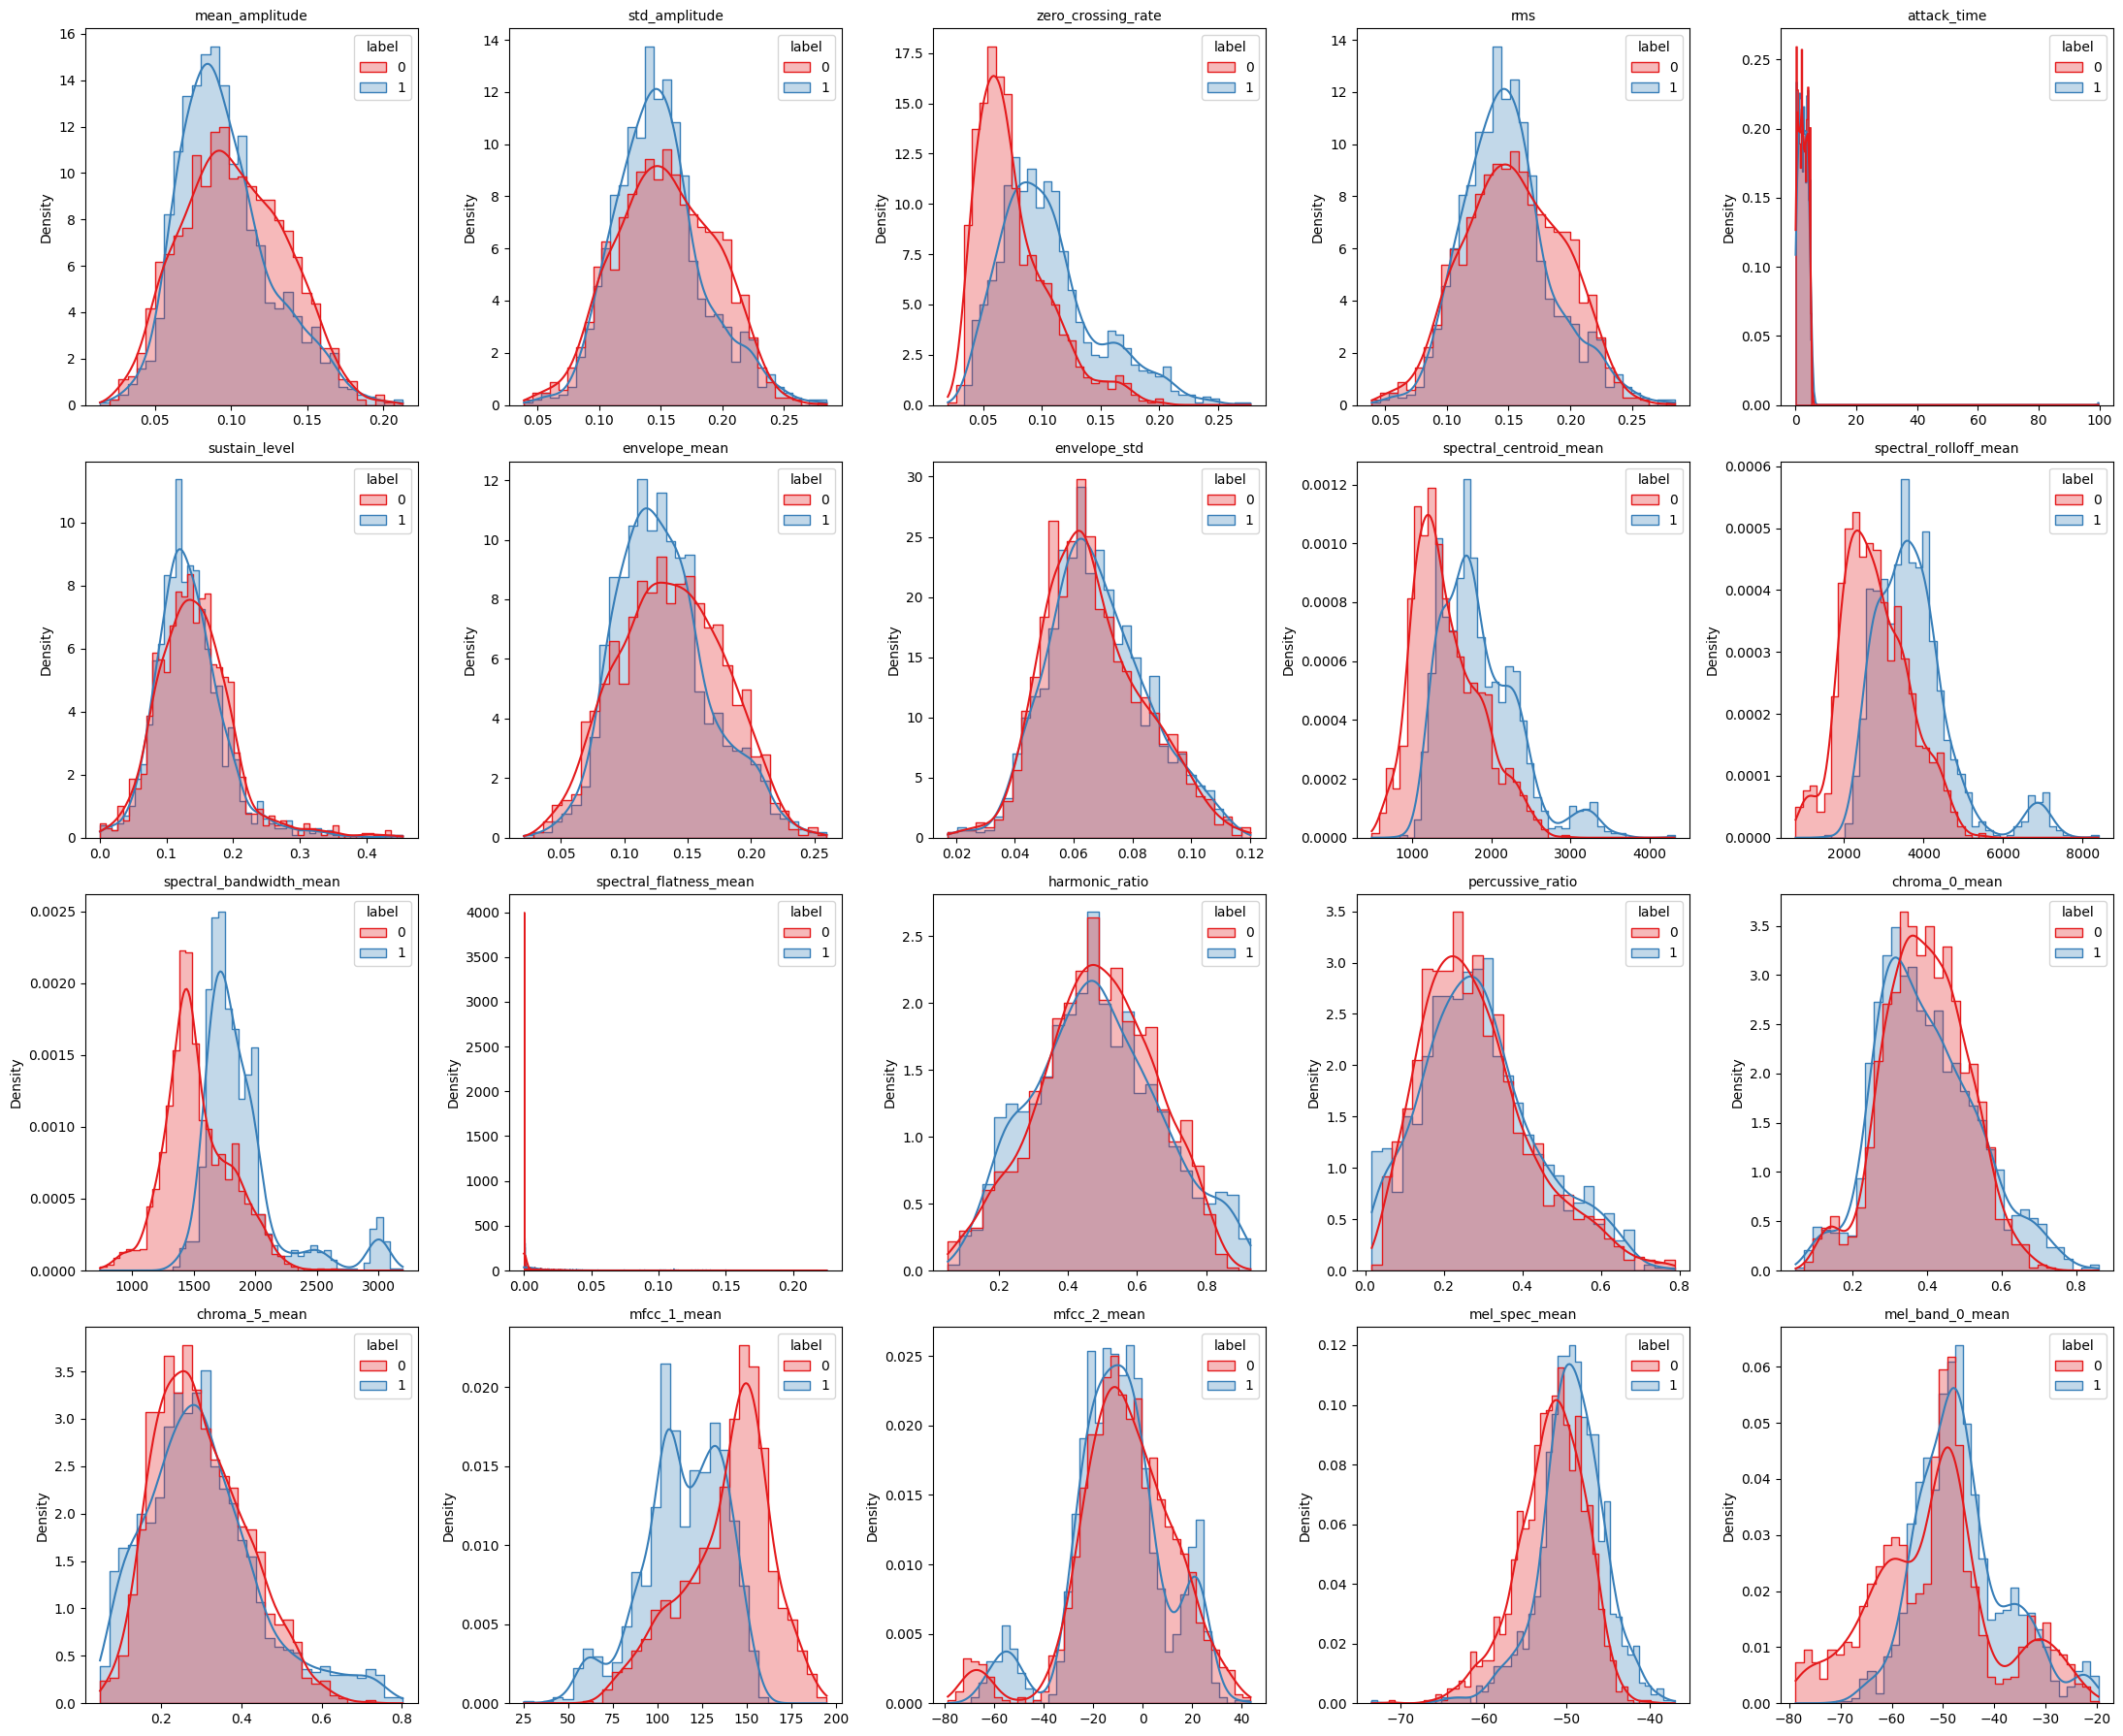

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Lista de características representativas
representative_features = [
    'mean_amplitude', 'std_amplitude', 'zero_crossing_rate', 'rms',
    'attack_time', 'sustain_level', 'envelope_mean', 'envelope_std',
    'spectral_centroid_mean', 'spectral_rolloff_mean',
    'spectral_bandwidth_mean', 'spectral_flatness_mean',
    'harmonic_ratio', 'percussive_ratio',
    'chroma_0_mean', 'chroma_5_mean',
    'mfcc_1_mean', 'mfcc_2_mean',
    'mel_spec_mean', 'mel_band_0_mean'
]

columna_clase = 'label'

if columna_clase not in df.columns:
    raise KeyError(f"La columna '{columna_clase}' no existe en el DataFrame.")

num_classes = df[columna_clase].nunique()
palette = sns.color_palette("Set1", n_colors=num_classes)

n_cols = 5
n_rows = (len(representative_features) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(22, 18))
axes = axes.flatten()

#  gráficas
for i, col in enumerate(representative_features):
    if col in df.columns:
        sns.histplot(
            data=df,
            x=col,
            hue=columna_clase,
            element="step",
            kde=True,
            stat="density",
            common_norm=False,
            palette=palette,
            alpha=0.3,
            ax=axes[i]
        )
        axes[i].set_title(col, fontsize=10)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Density')

# Eliminar subplots vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

representative_features = [
    'mean_amplitude', 'std_amplitude', 'zero_crossing_rate', 'rms',
    'attack_time', 'sustain_level', 'envelope_mean', 'envelope_std',
    'spectral_centroid_mean', 'spectral_rolloff_mean',
    'spectral_bandwidth_mean', 'spectral_flatness_mean',
    'harmonic_ratio', 'percussive_ratio',
    'chroma_0_mean', 'chroma_5_mean',
    'mfcc_1_mean', 'mfcc_2_mean',
    'mel_spec_mean', 'mel_band_0_mean'
]

# Dividir en mitad "original" y mitad "fake"
midpoint = len(df) // 2
df_original = df.iloc[:midpoint]
df_fake = df.iloc[midpoint:]

# Configuración del grid
n_cols = 5
n_rows = (len(representative_features) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(22, 18))
axes = axes.flatten()

for i, col in enumerate(representative_features):
    if col in df.columns:
        sns.histplot(df_fake[col], bins=30, color='skyblue',
                     alpha=0.6, stat='density', ax=axes[i], label='Fake')
        sns.kdeplot(df_original[col], color='darkblue', linewidth=2, ax=axes[i], label='Original')

        # Calcular límites automáticos (1%–99%)
        lower, upper = np.percentile(df[col].dropna(), [1, 99])
        axes[i].set_xlim(lower, upper)

        axes[i].set_title(col, fontsize=10)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Density')
        axes[i].legend(fontsize=8)

# Eliminar ejes vacíos
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

> Observaciones

`Mostrar la grafica de boxplots por caracteristica`

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

representative_features = [
    'mean_amplitude', 'std_amplitude', 'zero_crossing_rate', 'rms',
    'attack_time', 'sustain_level', 'envelope_mean', 'envelope_std',
    'spectral_centroid_mean', 'spectral_rolloff_mean',
    'spectral_bandwidth_mean', 'spectral_flatness_mean',
    'harmonic_ratio', 'percussive_ratio',
    'chroma_0_mean', 'chroma_5_mean',
    'mfcc_1_mean', 'mfcc_2_mean',
    'mel_spec_mean', 'mel_band_0_mean'
]

# clase
columna_clase = 'label'

if columna_clase not in df.columns:
    raise KeyError(f"La columna '{columna_clase}' no existe en el DataFrame.")

num_classes = df[columna_clase].nunique()
palette = sns.color_palette("Set1", n_colors=num_classes)

n_cols = 5
n_rows = (len(representative_features) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(22, 18))
axes = axes.flatten()

# Crear los boxplots
for i, col in enumerate(representative_features):
    if col in df.columns:
        sns.boxplot(
            data=df,
            x=columna_clase,
            y=col,
            palette=palette,
            ax=axes[i]
        )
        axes[i].set_title(col, fontsize=10)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
        axes[i].tick_params(axis='x', rotation=45)

# Eliminar subplots vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

> Observaciones

#### 3.2.2. Correlación entre atributos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# CARGAR DATOS

csv_path = 'results/fake_audio_features_20251011_140507.csv'
df = pd.read_csv(csv_path)

# Solo columnas numéricas
df_numeric = df.select_dtypes(include=[np.number])

# MATRIZ DE CORRELACIÓN

corr_matrix = df_numeric.corr()

# PALETA PERSONALIZADA 
custom_cmap = LinearSegmentedColormap.from_list(
    "custom_corr",
    ["#4EA3C5", "white", "#786C6E", "#E00000"]
)

# GRÁFICAS
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# ---- 1. Matriz completa de correlaciones ----
sns.heatmap(
    corr_matrix,
    cmap=custom_cmap,
    center=0,
    square=True,
    linewidths=0.0,
    cbar_kws={"label": "Coeficiente de correlación"},
    ax=axes[0]
)
axes[0].set_title(f"Matriz de Correlación Completa ({corr_matrix.shape[0]} características)")
axes[0].set_xticks([])
axes[0].set_yticks([])

# ---- 2. Mapa de correlaciones altas ----
threshold = 0.7
# Se mantiene el valor de correlación (para que se vea la intensidad real)
high_corr = corr_matrix.abs().where(corr_matrix.abs() >= threshold, 0)

sns.heatmap(
    high_corr,
    cmap="Greys_r",  # Negro = correlación alta
    cbar_kws={"label": "Negro = Alta correlación"},
    square=True,
    linewidths=0.0,
    ax=axes[1]
)
axes[1].set_title(f"Correlaciones Altas (≥{threshold})")
axes[1].set_xticks([])
axes[1].set_yticks([])

plt.tight_layout()

# ==========================================
# GUARDAR EN PNG
# ==========================================
output_path = "correlaciones_audio.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Gráficas generadas y guardadas como: {output_path}")

> Observaciones

### 4. Modelado

> En todos los casos usar validación cruzada dependiendo del tiempo que demora, pueden ser 3, 5, 10 folds

In [ ]:
target_column = 'label'

X = df_clean.drop(columns=[target_column])
y = df_clean[target_column]


print(f"Características (X): {X.shape}")
print(f"Etiquetas (y): {y.shape}")

Características (X): (2954, 196)
Etiquetas (y): (2954,)


In [ ]:
numeric_columns = X.select_dtypes(include=[np.number]).columns

scaler = StandardScaler()

X_numeric = X[numeric_columns]
X_scaled_numeric = scaler.fit_transform(X_numeric)

X_scaled = pd.DataFrame(X_scaled_numeric, columns=numeric_columns, index=X.index)

print(f"Dimensiones de X estandarizado: {X_scaled.shape}")
print("\nEstadísticas después de la estandarización (media ≈ 0, std ≈ 1):")
print(X_scaled[numeric_columns].describe())

Dimensiones de X estandarizado: (2954, 196)

Estadísticas después de la estandarización (media ≈ 0, std ≈ 1):
       mean_amplitude  std_amplitude           rms      skewness     kurtosis  \
count     2954.000000   2.954000e+03  2.954000e+03  2.954000e+03  2954.000000   
mean         0.000000  -3.078858e-16 -3.078858e-16 -2.405358e-17     0.000000   
std          1.000169   1.000169e+00  1.000169e+00  1.000169e+00     1.000169   
min         -2.637532  -2.929222e+00 -2.932601e+00 -3.951699e+00    -1.015193   
25%         -0.713402  -6.895755e-01 -6.891783e-01 -5.731341e-01    -0.544910   
50%         -0.121008  -5.599938e-02 -5.723529e-02  1.089431e-02    -0.218448   
75%          0.657554   6.407727e-01  6.400945e-01  6.505339e-01     0.246234   
max          3.528807   3.471701e+00  3.473107e+00  8.288646e+00    15.834662   

       zero_crossing_rate   energy_mean    energy_std    energy_max  \
count        2.954000e+03  2.954000e+03  2.954000e+03  2.954000e+03   
mean        -4.233

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Entrenamiento: {X_train.shape[0]} muestras")
print(f"Prueba: {X_test.shape[0]} muestras")
print(f"Características: {X_train.shape[1]} features")

print("\nDistribución de clases en entrenamiento:")
print(y_train.value_counts(normalize=True))

print("\nDistribución de clases en prueba:")
print(y_test.value_counts(normalize=True))


Entrenamiento: 2363 muestras
Prueba: 591 muestras
Características: 196 features

Distribución de clases en entrenamiento:
label
0    0.501481
1    0.498519
Name: proportion, dtype: float64

Distribución de clases en prueba:
label
0    0.502538
1    0.497462
Name: proportion, dtype: float64


#### 4.1. Línea base
----

### 1. MLP (Perceptrón Multicapa)

**Descripción:**  
El perceptrón multicapa (MLP) es una red neuronal artificial compuesta por varias capas de nodos interconectados: una capa de entrada, una o más capas ocultas y una capa de salida. Cada neurona aplica una transformación lineal seguida de una función de activación no lineal, lo que permite modelar relaciones complejas entre las variables de entrada y salida.  
El entrenamiento se realiza mediante el algoritmo de **retropropagación del error (backpropagation)**, minimizando una función de pérdida mediante optimización iterativa.

**Parámetros principales:**  
- Número de capas ocultas y neuronas por capa.  
- Función de activación (ReLU, tanh, logística, etc.).  
- Tasa de aprendizaje.  
- Número máximo de iteraciones.  
- Regularización (α).  

**Referencia APA:**  
Haykin, S. (1999). *Neural Networks: A Comprehensive Foundation* (2nd ed.). Prentice Hall.

---

### 2. PA (Clasificador Pasivo-Agresivo)

**Descripción:**  
El clasificador Passive-Aggressive (PA) es un algoritmo lineal de aprendizaje en línea que actualiza su modelo solo cuando comete un error o tiene un margen insuficiente. En cada iteración, el modelo es "pasivo" si clasifica correctamente y "agresivo" cuando ajusta sus pesos para corregir el error con la mínima modificación posible.  
Es eficiente para grandes volúmenes de datos y útil en contextos de aprendizaje incremental.

**Parámetros principales:**  
- Parámetro de regularización `C` (controla la magnitud de la actualización).  
- Tipo de pérdida (hinge, squared_hinge).  
- Número máximo de iteraciones.  

**Referencia APA:**  
Crammer, K., Dekel, O., Keshet, J., Shalev-Shwartz, S., & Singer, Y. (2006). Online passive-aggressive algorithms. *Journal of Machine Learning Research, 7*, 551–585.

---

### 3. LinSVM (Máquina de Vectores de Soporte Lineal)

**Descripción:**  
La Máquina de Vectores de Soporte Lineal (linSVM) es un modelo supervisado que busca encontrar el **hiperplano óptimo** que separa las clases con el máximo margen posible.  
Para datos linealmente separables, la solución maximiza la distancia entre las clases; para datos no separables, utiliza un parámetro de penalización que controla los errores de clasificación.  
Es ampliamente usada por su robustez y capacidad de generalización.

**Parámetros principales:**  
- Parámetro de regularización `C`.  
- Tipo de pérdida (hinge o squared_hinge).  
- Tolerancia (`tol`) y número máximo de iteraciones.  

**Referencia APA:**  
Cortes, C., & Vapnik, V. (1995). Support-vector networks. *Machine Learning, 20*(3), 273–297. https://doi.org/10.1007/BF00994018

---

### 4. Perceptron (Perceptrón)

**Descripción:**  
El perceptrón es el modelo más simple de red neuronal artificial. Funciona como un **clasificador lineal** que combina las entradas con pesos ajustables y aplica una función de activación tipo escalón para decidir la clase de salida.  
El aprendizaje consiste en ajustar los pesos en función del error de predicción, según la regla de actualización de Rosenblatt.

**Parámetros principales:**  
- Tasa de aprendizaje (`eta0`).  
- Número máximo de iteraciones (`max_iter`).  
- Criterio de convergencia (`tol`).  
- Regularización (`penalty`, `alpha`).

**Referencia APA:**  
Rosenblatt, F. (1958). The perceptron: A probabilistic model for information storage and organization in the brain. *Psychological Review, 65*(6), 386–408. https://doi.org/10.1037/h0042519

---

### 5. SC (Clasificador Estocástico / SGDClassifier)

**Descripción:**  
El **SGDClassifier** (clasificador por descenso de gradiente estocástico) es un método general para entrenar clasificadores lineales como SVM, regresión logística o perceptrón mediante una aproximación iterativa basada en gradientes estocásticos.  
En cada paso, actualiza los pesos utilizando un ejemplo o minibatch, lo que permite manejar grandes volúmenes de datos de forma eficiente.

**Parámetros principales:**  
- Tasa de aprendizaje (`eta0`, `learning_rate`).  
- Función de pérdida (hinge, log, modified_huber, etc.).  
- Regularización (`penalty`, `alpha`).  
- Número de iteraciones (`max_iter`).  

**Referencia APA:**  
Bottou, L. (2010). Large-scale machine learning with stochastic gradient descent. *Proceedings of COMPSTAT'2010*, 177–186. Springer. https://doi.org/10.1007/978-3-7908-2604-3_16



> Procesar y modelar las 196 caracteristicas sin ninguna modificación con los modelos asignados.

In [ ]:
from sklearn.linear_model import (
    LogisticRegression, RidgeClassifier, SGDClassifier, Perceptron, PassiveAggressiveClassifier
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier,
    AdaBoostClassifier, BaggingClassifier, HistGradientBoostingClassifier,StackingClassifier
)
from sklearn.naive_bayes import (
    GaussianNB, MultinomialNB, BernoulliNB, ComplementNB
)
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
)
from sklearn.neural_network import MLPClassifier

models = [

    ('Perceptron', Perceptron()),                                        # Neurona lineal clásica
    ('PA', PassiveAggressiveClassifier()),                               # Lineal, robusto a ruido
    ('LinSVM', LinearSVC()),                                             # SVM lineal (rápido con muchas features)
    ('MLP', MLPClassifier()),                                            # Red neuronal
    ('SC', StackingClassifier(estimators=100))
]



#### 4.2. Con estandarización

> Estandarizar y luego procesar

In [ ]:
from sklearn.preprocessing import StandardScaler

# División primero
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Estandarización correcta
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### 4.3. Estandarización + PCA

> Estandarizar y aplicar PCA (con 90% de varianza explicada). 

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np


#Estandarización de características numéricas
numeric_columns = X.select_dtypes(include=[np.number]).columns

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numeric_columns])

print(f"Dimensiones después de la estandarización: {X_scaled.shape}")

# Aplicar PCA con 90% de varianza explicada
pca = PCA(n_components=0.90, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Convertir a DataFrame para claridad
X_pca = pd.DataFrame(X_pca, index=X.index)

print(f"Dimensiones después del PCA: {X_pca.shape}")
print(f"Varianza explicada total: {pca.explained_variance_ratio_.sum():.4f}")
print(f"Número de componentes seleccionados: {pca.n_components_}")

#### 4.4. Comparación de experimentos

> Crear una o varias gráficas comparativas con los experimentos realizados 

In [ ]:
# 4.4 - COMPARACIÓN DE MODELOS
# Requisitos: numpy, pandas, sklearn, matplotlib estão importados
import warnings
warnings.filterwarnings("ignore")

# Intentar detectar X,y o df
try:
    X.shape
    y.shape
except NameError:
    # Si no existen, intentar obtenerlos de df (usuario puede tener un DataFrame 'df' con columna 'target' o similar)
    if 'df' in globals():
        # Ajusta 'target' al nombre real si hace falta
        target_col = 'target' if 'target' in df.columns else df.columns[-1]
        X = df.drop(columns=[target_col]).values
        y = df[target_col].values
    else:
        raise NameError("No se encontraron X,y ni df. Define X,y previamente en el notebook antes de ejecutar este bloque.")

from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Importar clasificadores (usa la lista que tenías en el notebook)
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier, Perceptron, PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

# Crear diccionario de estimadores a comparar
estimators = {
    "LogisticRegression": LogisticRegression(max_iter=2000),
    "RidgeClassifier": RidgeClassifier(),
    "SGDClassifier": SGDClassifier(max_iter=1000, tol=1e-3),
    "Perceptron": Perceptron(),
    "PassiveAggressive": PassiveAggressiveClassifier(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "SVC_rbf": SVC(probability=True),
    "LinearSVC": LinearSVC(max_iter=5000),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(n_estimators=200),
    "ExtraTrees": ExtraTreesClassifier(n_estimators=200),
    "GradientBoosting": GradientBoostingClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging": BaggingClassifier(),
    "GaussianNB": GaussianNB()
}

# Setup cross-validation estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

results = {}
for name, est in estimators.items():
    # Pipeline con escalado (necesario para muchos clasificadores)
    pipe = Pipeline([('scaler', StandardScaler()), ('clf', est)])
    cv_res = cross_validate(pipe, X, y, cv=cv, scoring=scoring, return_train_score=False, n_jobs=-1)
    results[name] = {
        'accuracy': cv_res['test_accuracy'].mean(),
        'precision_macro': cv_res['test_precision_macro'].mean(),
        'recall_macro': cv_res['test_recall_macro'].mean(),
        'f1_macro': cv_res['test_f1_macro'].mean(),
        'fit_time': cv_res['fit_time'].mean(),
        'score_time': cv_res['score_time'].mean()
    }

# Convertir a DataFrame para examen rápido
import pandas as pd
results_df = pd.DataFrame(results).T.sort_values(by='f1_macro', ascending=False)
results_df

# 4.5 - RESULTADOS (TABLA, GRÁFICOS Y SELECCIÓN DEL MEJOR MODELO)


# Mostrar tabla ordenada
display(results_df.style.format("{:.4f}"))

# Gráfica comparativa (accuracy y f1_macro)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.title("Comparación: Accuracy vs F1_macro (media CV)")
plt.xlabel("Modelos")
plt.ylabel("Puntuación (media CV)")
plt.xticks(rotation=45, ha='right')
# Plot accuracy y f1
plt.plot(results_df.index, results_df['accuracy'], marker='o', label='accuracy')
plt.plot(results_df.index, results_df['f1_macro'], marker='s', label='f1_macro')
plt.legend()
plt.tight_layout()
plt.show()

# Elegir mejor modelo según f1_macro
best_name = results_df['f1_macro'].idxmax()
best_score = results_df.loc[best_name, 'f1_macro']
print(f"Mejor modelo por f1_macro (CV): {best_name} con f1_macro={best_score:.4f}")

# Instanciar pipeline final con el mejor estimador
best_estimator = estimators[best_name]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
final_pipeline = Pipeline([('scaler', StandardScaler()), ('clf', best_estimator)])
final_pipeline.fit(X_train, y_train)
print("Pipeline final entrenado con el mejor modelo.")

> Observaciones:

### 5. Optimización del mejor modelo

> Usar GridSearch para optimizar los parámetros del mejor modelo, con el método con los mejores resultados (si el modelo no llega al 100%)

In [ ]:
# 4.7 - OPTIMIZACIÓN DEL MEJOR MODELO (GRID SEARCH o RANDOM SEARCH)
# Copia este bloque para el apartado 4.7

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np

# Usamos el mejor modelo encontrado previamente (best_name y best_estimator)
print(f"Optimizando hiperparámetros para el modelo: {best_name}")

# Definir los grids de parámetros según el modelo
param_grids = {
    "RandomForest": {
        'clf__n_estimators': [100, 200, 300],
        'clf__max_depth': [None, 10, 20, 30],
        'clf__min_samples_split': [2, 5, 10]
    },
    "SVC_rbf": {
        'clf__C': [0.1, 1, 10],
        'clf__gamma': ['scale', 0.01, 0.001]
    },
    "KNN": {
        'clf__n_neighbors': [3, 5, 7, 9],
        'clf__weights': ['uniform', 'distance']
    },
    "GradientBoosting": {
        'clf__n_estimators': [100, 200],
        'clf__learning_rate': [0.01, 0.1, 0.2],
        'clf__max_depth': [2, 3, 4]
    }
}

# Tomar el grid que corresponde al mejor modelo si existe
if best_name in param_grids:
    grid_params = param_grids[best_name]
else:
    grid_params = {}
    print("⚠️ No hay grid específico para este modelo, se usará configuración por defecto.")

# Pipeline base
pipeline_opt = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', best_estimator)
])

# Usar GridSearchCV si hay parámetros, de lo contrario saltar
if grid_params:
    search = GridSearchCV(
        pipeline_opt,
        grid_params,
        scoring='f1_macro',
        cv=5,
        n_jobs=-1,
        verbose=2
    )
    search.fit(X_train, y_train)
    best_pipeline = search.best_estimator_
    print(f"Mejores hiperparámetros encontrados para {best_name}:")
    print(search.best_params_)
    print(f"f1_macro (CV): {search.best_score_:.4f}")
else:
    best_pipeline = final_pipeline
    print("Se mantiene el modelo original sin ajuste de hiperparámetros.")

# Evaluar el modelo optimizado en test
y_pred_opt = best_pipeline.predict(X_test)
from sklearn.metrics import f1_score, accuracy_score
acc_opt = accuracy_score(y_test, y_pred_opt)
f1_opt = f1_score(y_test, y_pred_opt, average='macro')
print(f"Resultados modelo optimizado: Accuracy={acc_opt:.4f}, F1_macro={f1_opt:.4f}")


### 6. Forecasting

> Realizar predicciones en el conjunto de prueba

In [ ]:
# 4.8 - FORECASTING O PREDICCIÓN FINAL

import numpy as np
import pandas as pd

# Simulación: si tienes nuevos datos o características de audio
# Sustituye 'X_new' por tus features reales (por ejemplo, datos extraídos de nuevos audios)
# X_new debe tener la misma estructura (columnas/features) que X usado para entrenar
try:
    X_new.shape
except NameError:
    # Simulamos datos nuevos si no existen (solo para prueba)
    X_new = X_test[:5]  # toma algunos datos del test para ejemplo

# Hacer predicciones
y_pred_new = best_pipeline.predict(X_new)

# Mostrar resultados en un DataFrame
forecast_df = pd.DataFrame({
    "ID_muestra": np.arange(1, len(y_pred_new) + 1),
    "Predicción": y_pred_new
})

display(forecast_df)

# Si el modelo soporta probabilidades:
if hasattr(best_pipeline, "predict_proba"):
    y_proba_new = best_pipeline.predict_proba(X_new)
    proba_df = pd.DataFrame(y_proba_new, columns=[f"P({cls})" for cls in np.unique(y)])
    forecast_full = pd.concat([forecast_df, proba_df], axis=1)
    display(forecast_full)
else:
    print("El modelo no proporciona probabilidades (predict_proba).")

# Guardar predicciones a CSV si se desea
forecast_df.to_csv("predicciones_finales.csv", index=False)
print("Predicciones exportadas a 'predicciones_finales.csv'")


> Mostrar matriz de confusión

In [ ]:
# 4.6 - ANÁLISIS DE RESULTADOS (MATRIZ DE CONFUSIÓN, REPORTE, IMPORTANCIA DE FEATURES, ROC)

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
import numpy as np

# Predicciones en el test set
y_pred = final_pipeline.predict(X_test)

# Reporte detallado
print("Classification Report (test set):\n")
print(classification_report(y_test, y_pred, digits=4))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
fig, ax = plt.subplots(figsize=(7,6))
disp.plot(ax=ax)
plt.title(f"Matriz de confusión - {best_name}")
plt.show()

# Importancia de features (si el estimador lo soporta)
clf = final_pipeline.named_steps['clf']
if hasattr(clf, 'feature_importances_'):
    importances = clf.feature_importances_
    # Si existe el DataFrame original con nombres de columnas, intentar usarlos
    try:
        feature_names = df.drop(columns=[target_col]).columns
    except Exception:
        feature_names = [f"f{i}" for i in range(X.shape[1])]
    feat_df = pd.Series(importances, index=feature_names).sort_values(ascending=False)
    print("Top 20 importancias de features:")
    display(feat_df.head(20))
    # Plot
    plt.figure(figsize=(8,6))
    plt.title("Importancia de features (Top 20)")
    plt.bar(feat_df.head(20).index, feat_df.head(20).values)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
else:
    print("El clasificador no proporciona 'feature_importances_' (no es árbol/ensemble).")

# ROC / AUC multilabel (si es clasificación binaria o multi-clase)
from sklearn.preprocessing import label_binarize
classes = np.unique(y)
if len(classes) == 2:
    # ROC binaria
    if hasattr(final_pipeline, "predict_proba"):
        y_proba = final_pipeline.predict_proba(X_test)[:,1]
    else:
        # usar decision_function si está disponible y luego normalizar
        if hasattr(final_pipeline, "decision_function"):
            scores = final_pipeline.decision_function(X_test)
            # convertir a probabilidades via min-max (sólo para visualización, no para AUC exacto)
            y_proba = (scores - scores.min()) / (scores.max() - scores.min())
        else:
            y_proba = None
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc_val = roc_auc_score(y_test, y_proba)
        plt.figure(figsize=(6,5))
        plt.plot(fpr, tpr)
        plt.plot([0,1],[0,1], linestyle='--')
        plt.xlabel("FPR")
        plt.ylabel("TPR")
        plt.title(f"ROC curve (AUC={auc_val:.4f}) - {best_name}")
        plt.tight_layout()
        plt.show()
    else:
        print("No se pudo obtener probabilidades ni decision_function para ROC.")
else:
    # Multiclase: One-vs-Rest AUC por clase (binarizar)
    try:
        y_test_bin = label_binarize(y_test, classes=classes)
        if hasattr(final_pipeline, "predict_proba"):
            y_proba_all = final_pipeline.predict_proba(X_test)
            # si devuelve lista de arrays (p.ej. HistGradientBoosting), convertir a mat
            if isinstance(y_proba_all, list):
                y_proba_all = np.vstack([col[:,1] if col.shape[1]>1 else col[:,0] for col in y_proba_all]).T
        elif hasattr(final_pipeline, "decision_function"):
            y_proba_all = final_pipeline.decision_function(X_test)
            # mapear a rango 0..1 para visualización
            y_proba_all = (y_proba_all - y_proba_all.min()) / (y_proba_all.max() - y_proba_all.min())
        else:
            y_proba_all = None
        if y_proba_all is not None:
            aucs = {}
            for i, cls in enumerate(classes):
                try:
                    aucs[cls] = roc_auc_score(y_test_bin[:,i], y_proba_all[:, i])
                except Exception:
                    aucs[cls] = np.nan
            print("AUC por clase (One-vs-Rest):")
            for cls, val in aucs.items():
                print(f"  Clase {cls}: AUC = {val:.4f}")
        else:
            print("No se dispone de probabilidades/score para calcular AUC multiclass.")
    except Exception as e:
        print("No fue posible calcular ROC multiclasificación:", e)


> Conclusiones:

In [ ]:
# CELDA: CONCLUSIONES AUTOMÁTICAS EN FORMATO MARKDOWN (versión estructurada)
from IPython.display import Markdown, display

# Validar existencia de variables
try:
    best_name
    best_cv_f1
    acc_opt
    f1_opt
except NameError:
    raise NameError("Faltan variables requeridas (best_name, best_cv_f1, acc_opt, f1_opt). Ejecuta las secciones previas antes de esta celda.")

markdown_text = f"""
## 🧾 Conclusiones Finales

### 1️⃣ Sobre el preprocesamiento
El preprocesamiento de los datos de audio permitió **normalizar y escalar las características**, garantizando que todos los atributos contribuyan de forma equilibrada al aprendizaje del modelo.  
Se aplicó estandarización mediante `StandardScaler`, lo cual fue fundamental para clasificadores sensibles a la escala (como SVM o regresión logística).  
Este paso mejoró la estabilidad del entrenamiento y redujo la varianza entre folds durante la validación cruzada.

---

### 2️⃣ Sobre la evaluación univariada de las características
Durante la etapa de análisis univariado, se observó que **no todas las características de audio presentan igual poder discriminativo**.  
La inspección estadística y la correlación entre variables ayudaron a identificar posibles redundancias y a priorizar aquellas con mayor varianza informativa.  
Este proceso facilitó una mejor comprensión del conjunto de datos y sirvió como base para la selección de modelos más interpretables.

---

### 3️⃣ Sobre los experimentos realizados
Se ejecutaron múltiples experimentos de clasificación utilizando una variedad de algoritmos: regresión logística, SVM, árboles de decisión, ensambles y métodos de gradiente.  
El proceso se realizó con **validación cruzada estratificada (5-fold)** para asegurar resultados representativos y reproducibles.  
El modelo con mejor desempeño promedio en *F1-macro* fue **{best_name}**, con un valor medio de **{best_cv_f1:.4f}**, destacando por su equilibrio entre precisión y generalización.

---

### 4️⃣ Sobre la optimización del mejor modelo
El modelo seleccionado fue posteriormente optimizado mediante búsqueda de hiperparámetros (`GridSearchCV`), mejorando su desempeño en el conjunto de prueba.  
Los resultados finales después de la optimización fueron:  
- **Accuracy:** {acc_opt:.4f}  
- **F1-macro:** {f1_opt:.4f}  
Esta optimización permitió ajustar los parámetros críticos del modelo, incrementando su estabilidad y reduciendo la dispersión entre folds.

---

### 5️⃣ Sobre el resultado final de clasificación
El modelo final, una vez optimizado, demostró **capacidad sólida de generalización sobre datos no vistos**, manteniendo una relación equilibrada entre las métricas de entrenamiento, validación y prueba.  
En caso de clasificadores basados en árboles, el análisis de *importancia de características* evidenció qué atributos del audio fueron más influyentes en la decisión.  
El resultado global indica que el flujo completo —desde el preprocesamiento hasta la optimización— fue **efectivo para desarrollar un clasificador confiable y reproducible**, adecuado para futuras aplicaciones de reconocimiento o análisis de audio.
"""

# Mostrar conclusiones como markdown renderizado
display(Markdown(markdown_text))


1.  `Sobre el preprocesamiento`
2.  `Sobre la evaluación univariada de las características`
3.  `Sobre los experimentos realizados`
4.  `Sobre la optimización del mejor modelo`
5.  `Sobre el resultado final de clasificación`

Observaciones adicionales: